In [22]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

In [47]:
# Birth-Annihilation Process
# Birth rate: mu
# Annihilation rate: lambda

lam = 1
mu = 0.2
a0 = lam + mu 

Time taken for extinction:  11.144425107400947


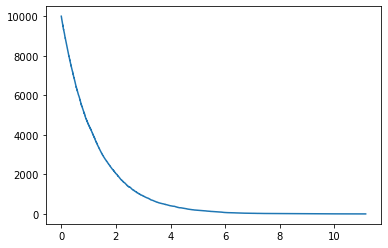

In [64]:
N0 = 10000
# Initial number of particles
def gillespie_birth_death(lambda_rate, mu_rate, N0, max_time):
    # Initialize variables
    t = 0
    N = N0
    times = [t]
    populations = [N]
    
    while t < max_time and N > 0:
        # Calculate propensities
        a_birth = mu_rate * N
        a_death = lambda_rate * N
        a_total = a_birth + a_death
        
        # Draw random numbers
        r1 = np.random.uniform(0, 1)
        r2 = np.random.uniform(0, 1)
        
        # Time until next event
        delta_t = -np.log(r1) / a_total
        t += delta_t
        
        # Determine which event occurs
        if r2 < a_birth / a_total:
            N += 1  # Birth event
        else:
            N -= 1  # Death event
        
        # Store results
        times.append(t)
        populations.append(N)
    
    return times[-1], times, populations
    

#show the population distribution per step
time_taken,time_points, population_distribution = gillespie_birth_death(lam, mu,N0, 100)
plt.plot(time_points, population_distribution)
print("Time taken for extinction: ", time_taken)


Average time taken for extinction:  6.212696142185542


(array([  2.,   3.,   6.,   4.,  19.,  20.,  41.,  59.,  78., 106., 142.,
        162., 240., 250., 316., 305., 346., 359., 372., 395., 380., 427.,
        382., 374., 380., 348., 349., 337., 295., 281., 268., 225., 218.,
        200., 224., 204., 192., 169., 133., 136., 120., 116.,  92.,  93.,
         79.,  65.,  76.,  50.,  46.,  57.,  46.,  38.,  40.,  36.,  30.,
         22.,  15.,  19.,  25.,  28.,  10.,  11.,  16.,   8.,  21.,  10.,
         10.,   4.,   3.,   7.,   2.,   4.,   4.,   6.,   4.,   5.,   3.,
          3.,   2.,   7.,   1.,   2.,   7.,   0.,   0.,   3.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,
          2.]),
 array([ 2.64383996,  2.77786103,  2.91188211,  3.04590319,  3.17992426,
         3.31394534,  3.44796642,  3.5819875 ,  3.71600857,  3.85002965,
         3.98405073,  4.1180718 ,  4.25209288,  4.38611396,  4.52013503,
         4.65415611,  4.78817719,  4.92219826,  5.05621934,  5.19024042,
         5.3242615 ,  5.45

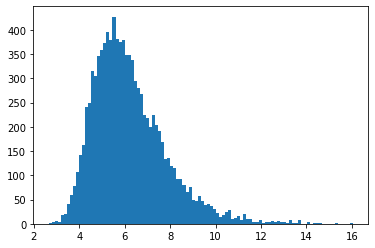

In [65]:
total_time = 0
times = []
N0 = 100
for i in range(10000):
    time_taken,time_points, population_distribution  = gillespie_birth_death(lam, mu,N0, 100)
    total_time += time_taken
    times.append(time_taken)

print("Average time taken for extinction: ", total_time/10000)
plt.hist(times, bins=100)

Theoretical time to extinction:  -1.25
